# **Sentiment Analysis of Tweets from Top Tech CEOs**

**Project Creators :**

**Manav Paul -**
👨🏻‍💻 Connect [LinkedIn](https://www.linkedin.com/in/manav-paul/) and [X(Twitter)](https://x.com/themanavpaul)

**Kuldeep -** 😎 [LinkedIn](https://www.linkedin.com/in/kuldeep7k/)

<br>


## **Introduction**

Social media platforms like Twitter provide valuable insights into public figures' thoughts, ideas, and engagement with their audience. This project focuses on performing sentiment analysis on tweets from the top tech CEOs of 2024. The goal is to analyze the emotional tone of their tweets to understand how they communicate with their followers and the sentiment patterns in their interactions.

---

## **Dataset Description**

The dataset used for this project was created by scraping tweets from the official Twitter accounts of the top 10 tech CEOs of 2024. The data scraping was performed on December 21, 2024, capturing 840 tweets from various accounts. This dataset includes a variety of metadata about each tweet, enabling both sentiment analysis and additional insights into the engagement metrics and language characteristics.

<br>

### **Top 10 Tech CEOs of 2024 and Their Twitter Accounts**

| CEO Name              | Company         | Twitter Handle     |
|-----------------------|-----------------|--------------------|
| Satya Nadella         | Microsoft       | @satyanadella      |
| Sundar Pichai         | Google          | @sundarpichai      |
| Tim Cook              | Apple           | @tim_cook          |
| Lisa Su               | AMD             | @LisaSu            |
| Arvind Krishna        | IBM             | @ArvindKrishna     |
| Sam Altman            | OpenAI          | @sama              |
| Chuck Robbins         | Cisco           | @ChuckRobbins      |
| Dara Khosrowshahi     | Uber            | @mcannonbrookes    |
| Mike Cannon-Brookes   | Atlassian       | @mcannonbrookes    |
| Jeff Bezos            | Amazon          | @JeffBezos         |
| Elon Musk             | SpaceX          | @elonmusk          |

### **Dataset Overview**
The dataset consists of 7,021 entries and 12 columns. Below is a detailed description of the columns:

<br>

| #  | Column      | Description                                                                 |
|----|-------------|-----------------------------------------------------------------------------|
| 1  | Username    | The name of the Twitter user (CEO) who posted the tweet.                    |
| 2  | Tweet ID    | Unique identifier for the tweet.                                            |
| 3  | Content     | The textual content of the tweet.                                           |
| 4  | Created At  | Timestamp indicating when the tweet was posted.                             |
| 5  | Language    | The language of the tweet's content.                                        |
| 6  | Source      | The source of the tweet (e.g., Twitter Web App, iPhone).                    |
| 7  | Retweets    | The number of retweets for the tweet.                                       |
| 8  | Likes       | The number of likes for the tweet.                                          |
| 9  | Replies     | The number of replies to the tweet.                                         |
| 10 | Quotes      | The number of quote tweets.                                                 |
| 11 | Views       | The total number of views the tweet received.                               |
| 12 | Sensitive   | Boolean indicating whether the tweet contains sensitive content.            |

---

### Data Highlights
- The dataset covers tweets from CEOs across major tech companies like Microsoft, Google, Apple, and SpaceX.
- Engagement metrics like Retweets, Likes, and Replies are included to evaluate the impact of each tweet.
- Sentiment analysis will be performed on the "Content" column, while engagement metrics will provide additional context.

This dataset forms the basis for analyzing how top tech leaders communicate online and the sentiments they evoke in their content. The insights derived from this analysis can offer valuable perspectives on public communication strategies in the tech industry.

---

### Libraries Used in the Project

- **pandas**: A robust data analysis library for manipulating and analyzing structured data.
- **re**: A Python library for handling regular expressions, enabling pattern matching and text manipulation.
- **nltk**: A comprehensive library for natural language processing (NLP), offering functions for tokenization, stemming, lemmatization, and more.
  - **nltk.tokenize.word_tokenize**: A function in NLTK that breaks text into individual words (tokens).
  - **nltk.corpus.stopwords**: A module in NLTK providing a collection of common stopwords for text preprocessing.
  - **nltk.stem.WordNetLemmatizer**: An NLTK tool for lemmatizing words, reducing them to their base or root forms.
- **matplotlib.pyplot**: A visualization library used to create static, interactive, and animated plots and graphs.
- **seaborn**: A data visualization library built on top of Matplotlib, providing a high-level interface for creating attractive and informative statistical graphics.
- **wordcloud.WordCloud**: A library for generating word clouds, visually highlighting the most frequently occurring words in a dataset.
- **emoji**: A library that provides functions for working with emojis, such as converting Unicode emojis to text and vice versa.
- **torch**: A powerful library for deep learning and tensor computations, widely used for building and training neural networks.
- **transformers**: A library by Hugging Face that provides pre-trained models for natural language processing tasks, enabling tasks like sequence classification, token classification, and text generation.
  - **AutoTokenizer**: A class in the Transformers library that loads pre-trained tokenizers for processing text input.
  - **AutoModelForSequenceClassification**: A class in the Transformers library that loads pre-trained models specifically for sequence classification tasks.




In [ ]:
# Import and Download libraries
import re
import pandas as pd
import nltk
import pickle
import torch
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForSequenceClassification

!pip install emoji

import emoji

# Download necessary NLTK data (if not already installed)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
print("NLTK data downloaded!")

# To ignore the warnings & make the code more presentable
import warnings
warnings.filterwarnings("ignore")  # This will suppress warnings in the output

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK data downloaded!


[nltk_data]   Package punkt_tab is already up-to-date!


### **Load Dataset**

In [ ]:
df = pd.read_csv("/content/sample_data/ceo_tweets_2024.csv")
df

,Username,Tweet ID,Content,Created At,Language,Source,Retweets,Likes,Replies,Quotes,Views,Sensitive
0,Elon Musk,1.870000e+18,"Wow, what a scam!",Sat Dec 21 16:09:56 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",4590,17588,2125,197,1968785,False
1,Elon Musk,1.870000e+18,Important thread to understand the magnitude o...,Sat Dec 21 16:03:57 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",6053,26274,1979,354,4335054,False
2,Elon Musk,1.870000e+18,RT @visegrad24: Saudi Arabia warned the German...,Sat Dec 21 16:02:05 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1665,0,0,0,5,False
3,Elon Musk,1.870000e+18,The vast emptiness of space,Sat Dec 21 16:00:35 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1356,9659,1795,135,1821824,False
4,Elon Musk,1.870000e+18,That would be industrial production proportion...,Sat Dec 21 15:54:18 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1073,5466,936,49,1522080,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Lisa Su,8.390000e+17,Thanks to all @AMD fans. It's been great seein...,Tue Mar 07 13:47:04 +0000 2017,en,"<a href=""http://twitter.com/download/iphone"" r...",63,372,22,2,0,False
7017,Lisa Su,8.380000e+17,"In NY today, chatting with @jonfortt of @CNBC ...",Fri Mar 03 15:49:52 +0000 2017,en,"<a href=""http://twitter.com/download/iphone"" r...",45,280,15,7,0,False
7018,Lisa Su,8.370000e+17,Join me on @reddit today at 12:30pmET for a li...,Thu Mar 02 17:21:37 +0000 2017,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",32,156,17,2,0,False
7019,Lisa Su,8.370000e+17,The best starts now! Welcome @AMDRyzen 7. Bi...,Thu Mar 02 14:52:23 +0000 2017,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",181,639,36,9,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    7021 non-null   object 
 1   Tweet ID    7021 non-null   float64
 2   Content     7021 non-null   object 
 3   Created At  7021 non-null   object 
 4   Language    7021 non-null   object 
 5   Source      7021 non-null   object 
 6   Retweets    7021 non-null   int64  
 7   Likes       7021 non-null   int64  
 8   Replies     7021 non-null   int64  
 9   Quotes      7021 non-null   int64  
 10  Views       7021 non-null   int64  
 11  Sensitive   7021 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 610.3+ KB


Observation:

The dataset contains 7021 entries and 12 columns. It includes both numerical (e.g., Retweets, Likes, Views) and categorical data (e.g., Username, Content, Language). The columns are free of missing values, and the data types are appropriately assigned, with 1 boolean, 1 float, 5 integer, and 5 object columns. The memory usage is approximately 610.3 KB

## Identify **Duplicate** Rows Based on `'Content'`

In [ ]:
# Identify duplicates based on 'Content'
duplicates_content = df[df.duplicated(subset=['Content'], keep=False)]  # 'keep=False' marks all duplicates as True

# Count the number of duplicated rows based on 'Content'
num_duplicates_content = duplicates_content.shape[0]
print(f"\nNumber of duplicated rows based on Content: {num_duplicates_content}")



Number of duplicated rows based on Content: 280


## **Remove** Duplicates based on `Content`


In [ ]:
# Identify duplicates based on 'Content'
duplicates_content = df[df.duplicated(subset=['Content'], keep=False)]  # 'keep=False' marks all duplicates as True

# Remove duplicates based on 'Content', keeping only the first occurrence
new_df_content = df.drop_duplicates(subset=['Content'], keep='first')  # Keeps only the first occurrence of each 'Content'

# If you want to check how many rows were removed, you can compare the shape of the original and new DataFrame
rows_removed_content = df.shape[0] - new_df_content.shape[0]
print(f"\nNumber of rows removed: {rows_removed_content}\n")


Number of rows removed: 198



### Explore Data

In [ ]:
# Print the new DataFrame after removing duplicates based on 'Content'
print("New DataFrame without duplicate Content:")
df = new_df_content

# Display the first few rows of a DataFrame.
df.head()

New DataFrame without duplicate Content:


,Username,Tweet ID,Content,Created At,Language,Source,Retweets,Likes,Replies,Quotes,Views,Sensitive
0,Elon Musk,1.870000e+18,"Wow, what a scam!",Sat Dec 21 16:09:56 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",4590,17588,2125,197,1968785,False
1,Elon Musk,1.870000e+18,Important thread to understand the magnitude o...,Sat Dec 21 16:03:57 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",6053,26274,1979,354,4335054,False
2,Elon Musk,1.870000e+18,RT @visegrad24: Saudi Arabia warned the German...,Sat Dec 21 16:02:05 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1665,0,0,0,5,False
3,Elon Musk,1.870000e+18,The vast emptiness of space,Sat Dec 21 16:00:35 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1356,9659,1795,135,1821824,False
4,Elon Musk,1.870000e+18,That would be industrial production proportion...,Sat Dec 21 15:54:18 +0000 2024,en,"<a href=""http://twitter.com/download/iphone"" r...",1073,5466,936,49,1522080,False


In [ ]:
# Get general information about the DataFrame (data types, missing values, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6823 entries, 0 to 7020
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    6823 non-null   object 
 1   Tweet ID    6823 non-null   float64
 2   Content     6823 non-null   object 
 3   Created At  6823 non-null   object 
 4   Language    6823 non-null   object 
 5   Source      6823 non-null   object 
 6   Retweets    6823 non-null   int64  
 7   Likes       6823 non-null   int64  
 8   Replies     6823 non-null   int64  
 9   Quotes      6823 non-null   int64  
 10  Views       6823 non-null   int64  
 11  Sensitive   6823 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 904.4+ KB


Observation:

After removing duplicate rows based on the "Content" column, the dataset now contains 6823 entries. It retains the same 12 columns, with all columns having non-null values. The data types remain consistent, including 1 boolean, 1 float, 5 integer, and 5 object columns.

In [ ]:
# Get summary statistics for numerical columns
df.describe()

,Tweet ID,Retweets,Likes,Replies,Quotes,Views
count,6.823000e+03,6823.000000,6823.000000,6823.000000,6823.000000,6.823000e+03
mean,1.505488e+18,1622.917045,10662.190825,588.720211,140.557233,1.925215e+06
std,3.386574e+17,5730.748965,40141.745439,2296.744974,740.340635,8.336687e+06
min,6.410000e+17,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.310000e+18,24.000000,13.000000,0.000000,0.000000,0.000000e+00
50%,1.580000e+18,141.000000,499.000000,25.000000,6.000000,0.000000e+00
75%,1.820000e+18,602.000000,4010.000000,214.000000,50.000000,4.685500e+04
max,1.870000e+18,85598.000000,791911.000000,49405.000000,27980.000000,1.280398e+08


## Analyze Tweet Frequency by `Username`

In [ ]:
# Group the data by 'Username' and count the number of tweets for each user
username_counts = df['Username'].value_counts()

# Print the count of tweets for each user
print(username_counts)

Username
Tim Cook         844
Satya Nadella    810
Nikesh Arora     795
Sundar Pichai    787
Chuck Robbins    771
Marc Benioff     760
Elon Musk        724
Sam Altman       642
Jeff Bezos       351
Lisa Su          339
Name: count, dtype: int64


### Observation After Removing Duplicates
After removing duplicate tweets, the number of unique tweets per CEO is as follows:

| Username         | Unique Tweets |
|------------------|---------------|
| Tim Cook         | 844           |
| Satya Nadella    | 810           |
| Nikesh Arora     | 795           |
| Sundar Pichai    | 787           |
| Chuck Robbins    | 771           |
| Marc Benioff     | 760           |
| Elon Musk        | 724           |
| Sam Altman       | 642           |
| Jeff Bezos       | 351           |
| Lisa Su          | 339           |

This step ensures the dataset's integrity and avoids skewed sentiment analysis results due to repeated tweets.

## Convert emojis in the text

In [ ]:
# Convert emojis in the text to descriptive names
def convert_emojis_to_text_with_library(text):
    return emoji.demojize(text, delimiters=(":", ":"))

# Apply the conversion to the Content column
df['Content'] = df['Content'].apply(convert_emojis_to_text_with_library)

## **Clean** and **Analyze** Source Information

In [ ]:
# Find all unique values in the 'Source' column
unique_sources = df['Source'].unique()

# Print the unique sources
print("Unique sources:")
print(unique_sources)

Unique sources:
['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'
 '<a href="https://periscope.tv" rel="nofollow">Periscope</a>'
 '<a href="http://itunes.apple.com/us/app/twitter/id409789998?mt=12" rel="nofollow">Twitter for Mac</a>'
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>'
 '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'
 '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="https://medium.com" rel="nofollow">Medium</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']


In [ ]:
# Extract the text between the HTML tags using Pandas' str.extract
df['Cleaned Source'] = df['Source'].str.extract(r'>(.*?)<\/a>', expand=False)

# Drop the old 'Source' column
df = df.drop(columns=['Source'])

# Print the unique cleaned sources
unique_cleaned_sources = df['Cleaned Source'].unique()
print("Unique cleaned sources:")
print(unique_cleaned_sources)

# Apply the function to clean the 'Source' column
# df = clean_source(df.copy())

Unique cleaned sources:
['Twitter for iPhone' 'Twitter Web App' 'Periscope' 'Twitter for Mac'
 'Twitter for iPad' 'Twitter Media Studio' 'Twitter for Android'
 'Twitter Web Client' 'Medium' 'Vine - Make a Scene']


In [ ]:
# Display the last few rows of a DataFrame.
df.tail()

,Username,Tweet ID,Content,Created At,Language,Retweets,Likes,Replies,Quotes,Views,Sensitive,Cleaned Source
7016,Lisa Su,8.390000e+17,Thanks to all @AMD fans. It's been great seein...,Tue Mar 07 13:47:04 +0000 2017,en,63,372,22,2,0,False,Twitter for iPhone
7017,Lisa Su,8.380000e+17,"In NY today, chatting with @jonfortt of @CNBC ...",Fri Mar 03 15:49:52 +0000 2017,en,45,280,15,7,0,False,Twitter for iPhone
7018,Lisa Su,8.370000e+17,Join me on @reddit today at 12:30pmET for a li...,Thu Mar 02 17:21:37 +0000 2017,en,32,156,17,2,0,False,Twitter Web Client
7019,Lisa Su,8.370000e+17,The best starts now! Welcome @AMDRyzen 7. Bi...,Thu Mar 02 14:52:23 +0000 2017,en,181,639,36,9,0,False,Twitter Web Client
7020,Lisa Su,8.370000e+17,Excited to be joining twitter. Thanks for the...,Wed Mar 01 03:26:33 +0000 2017,en,177,919,156,33,0,False,Twitter Web Client


# **Data Pre-Processing** : Clean Text Data to **TF-ID Vectorization**

## **Lemmatizer** and **Stopwords**

* **Lemmatization:** Reduces words to their base form (e.g., "running" -> "run") for better analysis.
* **Stop Words:** Removes common, insignificant words (e.g., "the," "a") that don't carry much meaning in text.

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print("Lemmatizer and stopwords initialized!")

Lemmatizer and stopwords initialized!


## **Cleaning Techniques**

*   Remove URLs
*   Remove Mentions
*   Remove Special Chars
*   Remove Stopwords
*   LowerCase Text
*   Tokenise Text
*   Lemmatize

In [ ]:
# Function to clean the 'Content' column for transformation
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+\b', '', text)
    # Remove mentions (including those preceded by "RT")
    # text = re.sub(r'(?:^RT\s+|^\s*RT\s+|\s+RT\s+)@\w+\b', '', text)

    # Remove special characters and numbers (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

### **Apply Above Changes**

*   Creates a new column named `'Cleaned Content'` containing the cleaned text.

In [ ]:
# Apply the cleaning function to the 'Content' column
df['Cleaned Content'] = df['Content'].apply(clean_text)

### **Show the changes made**

In [ ]:
# Print the first few rows of the DataFrame with the cleaned text
print(df[['Content', 'Cleaned Content']].head())

                                             Content  \
0                                  Wow, what a scam!   
1  Important thread to understand the magnitude o...   
2  RT @visegrad24: Saudi Arabia warned the German...   
3                        The vast emptiness of space   
4  That would be industrial production proportion...   

                                     Cleaned Content  
0                                           wow scam  
1  important thread understand magnitude failure ...  
2  rt saudi arabia warned german authority time m...  
3                               vast emptiness space  
4  would industrial production proportionate popu...  


# **Updated Dataset**
*   Remove Original '`Content`' Column

In [ ]:
# Remove the original 'Content' column
df = df.drop(columns=['Content'])

# View the updated dataset
print("Dataset after removing 'Content' column:")
df.head()

Dataset after removing 'Content' column:


,Username,Tweet ID,Created At,Language,Retweets,Likes,Replies,Quotes,Views,Sensitive,Cleaned Source,Cleaned Content
0,Elon Musk,1.870000e+18,Sat Dec 21 16:09:56 +0000 2024,en,4590,17588,2125,197,1968785,False,Twitter for iPhone,wow scam
1,Elon Musk,1.870000e+18,Sat Dec 21 16:03:57 +0000 2024,en,6053,26274,1979,354,4335054,False,Twitter for iPhone,important thread understand magnitude failure ...
2,Elon Musk,1.870000e+18,Sat Dec 21 16:02:05 +0000 2024,en,1665,0,0,0,5,False,Twitter for iPhone,rt saudi arabia warned german authority time m...
3,Elon Musk,1.870000e+18,Sat Dec 21 16:00:35 +0000 2024,en,1356,9659,1795,135,1821824,False,Twitter for iPhone,vast emptiness space
4,Elon Musk,1.870000e+18,Sat Dec 21 15:54:18 +0000 2024,en,1073,5466,936,49,1522080,False,Twitter for iPhone,would industrial production proportionate popu...


# **Sentiment Analysis**

## Model Building - Using Roberta Model (Hugging Face)
1. Loads a pre-trained sentiment analysis model: Uses Hugging Face's transformers library and specifically the "cardiffnlp/twitter-roberta-base-sentiment" model.
* Link : https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
2.  Defines a sentiment prediction function:
*  Tokenizes the input text.
*  Passes the tokens through the model.
*  Predicts the sentiment (Negative, Neutral, or Positive) based on the model's output probabilities.
3. Applies the prediction function: Applies the predict_sentiment function to the "Cleaned Content" column of the DataFrame.
4. Stores and displays results: Stores the predicted sentiments in a new column ("Sentiment") and optionally saves the DataFrame to a CSV file. Finally, displays the DataFrame with the "Cleaned Content" and "Sentiment" columns.

In [ ]:
# Load the sentiment analysis model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define a function to predict sentiment
def predict_sentiment(text):
    # Tokenize the input text
    tokens = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    ).to(device)  # Move tensors to the same device as the model

    # Get model predictions
    output = model(**tokens)
    scores = torch.nn.functional.softmax(output.logits, dim=-1)

    # Get sentiment label
    sentiment = torch.argmax(scores).item()
    labels = ["Negative", "Neutral", "Positive"]
    return labels[sentiment]

# Apply the function to the 'Cleaned Content' column
df["Sentiment"] = df["Cleaned Content"].apply(predict_sentiment)

# Save the results to a new CSV file (optional)
df.to_csv("sentiment_analysis_results.csv", index=False)

# Display the DataFrame with sentiment predictions
print(df[["Cleaned Content", "Sentiment"]].head())


                                     Cleaned Content Sentiment
0                                           wow scam  Negative
1  important thread understand magnitude failure ...  Negative
2  rt saudi arabia warned german authority time m...  Negative
3                               vast emptiness space   Neutral
4  would industrial production proportionate popu...   Neutral


## **Sentiment by Username**

* **Groups data by username and sentiment:** (Negative, Neutral, Positive) to each username.
* **Creates a grouped bar chart:** Using seaborn's `sns.barplot`.
* **x-axis** -> usernames, **y-axis** -> count of sentiment occurrences.


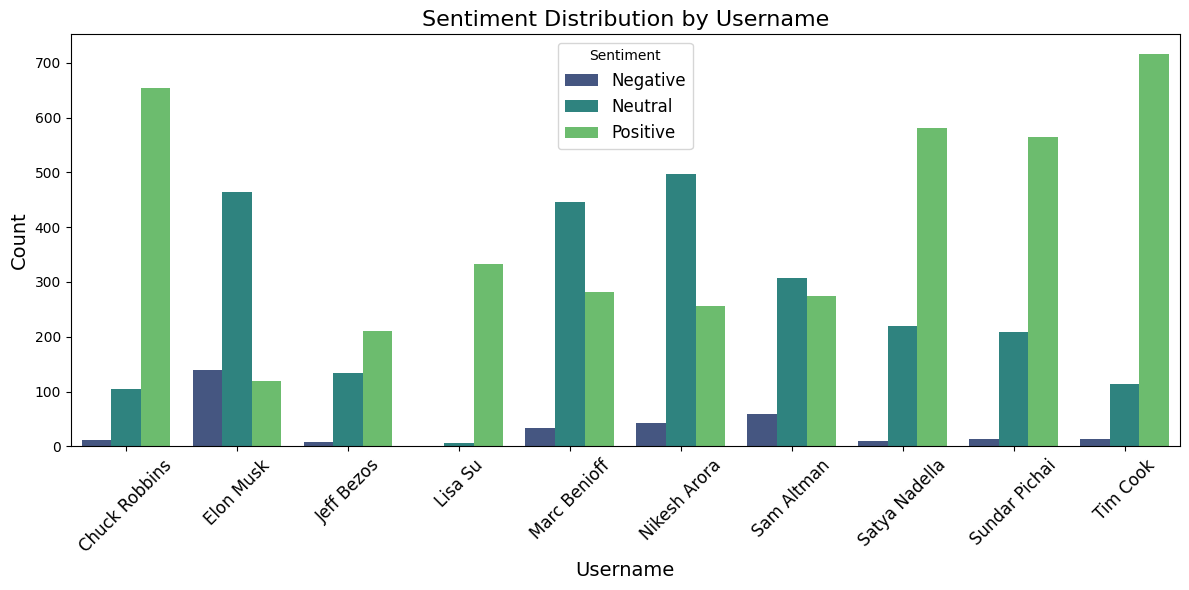

In [ ]:
# Count sentiment occurrences by username
sentiment_by_username = df.groupby(['Username', 'Sentiment']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sentiment_by_username,
    x='Username',
    y='Count',
    hue='Sentiment',
    palette='viridis'
)

# Customize the plot
plt.title('Sentiment Distribution by Username', fontsize=16)
plt.xlabel('Username', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## **Sentiment (Retweets, Likes)- Username**

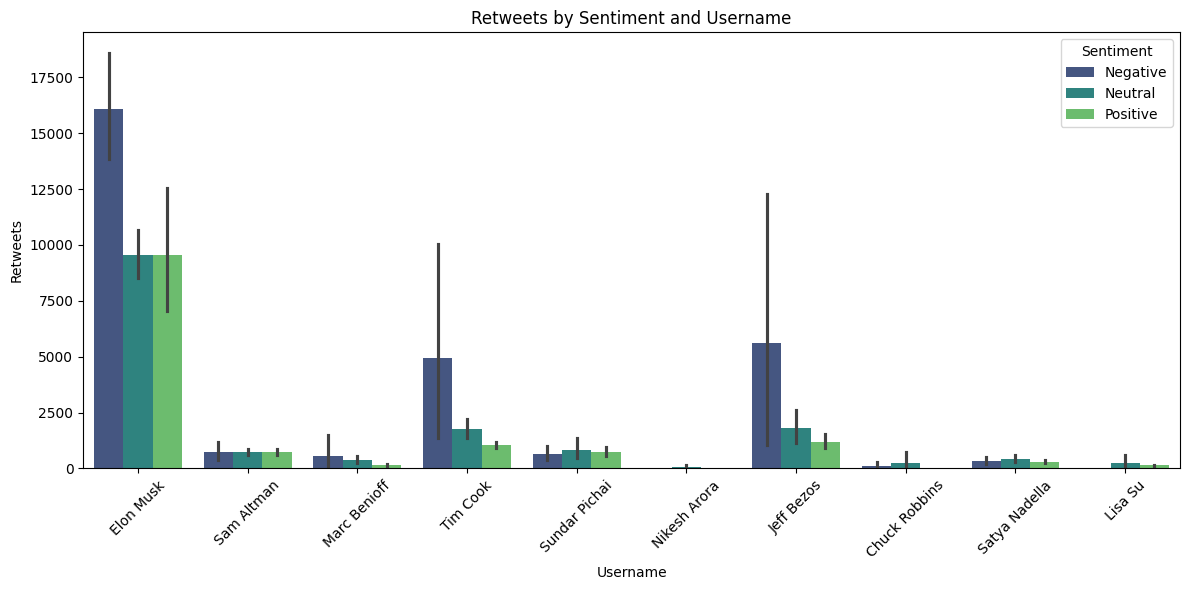

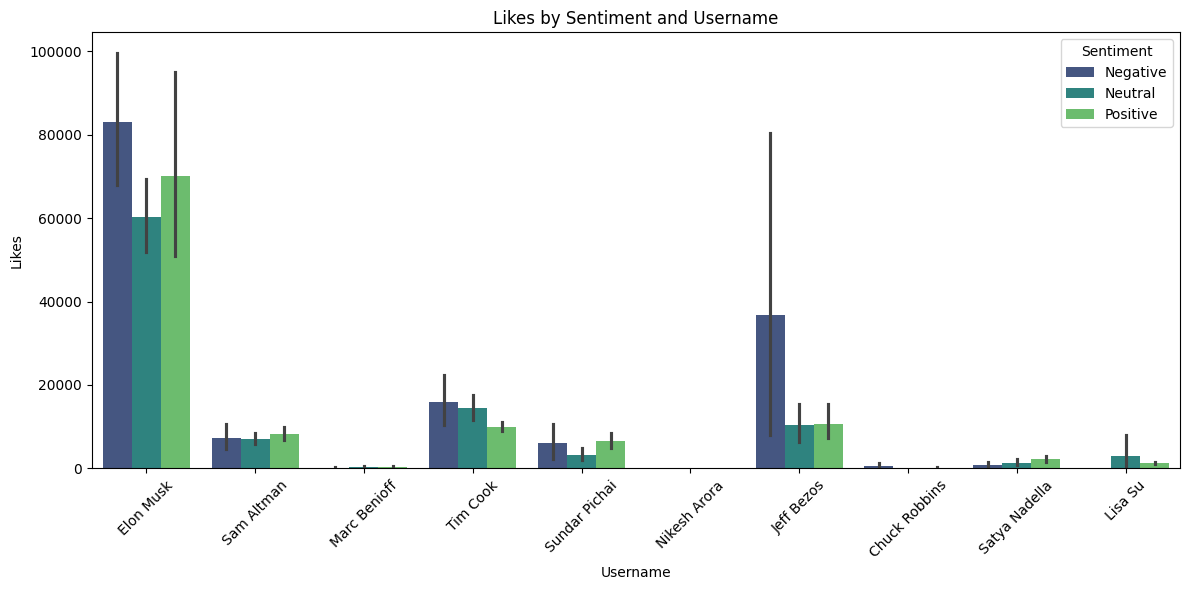

In [ ]:
# Engagement metrics (Retweets, Likes) grouped by Sentiment and Username
metrics = ["Retweets", "Likes"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="Username",
        y=metric,
        hue="Sentiment",
        palette="viridis",
        order=df["Username"].unique()
    )
    plt.title(f"{metric} by Sentiment and Username")
    plt.xlabel("Username")
    plt.ylabel(metric)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()


## **Sentiment Distribution Count (Negative, Neutral, Positive)**

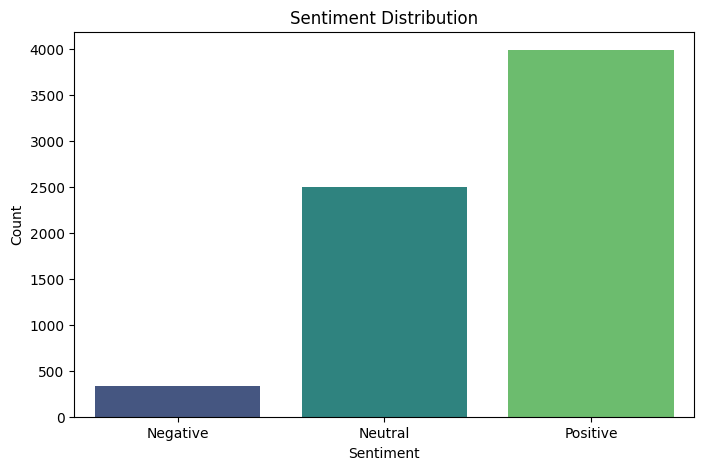

In [ ]:
# plot_sentiment_distribution Sentiment distribution count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="viridis", order=["Negative", "Neutral", "Positive"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## **Sentiment Metrics (Retweets, Likes)**

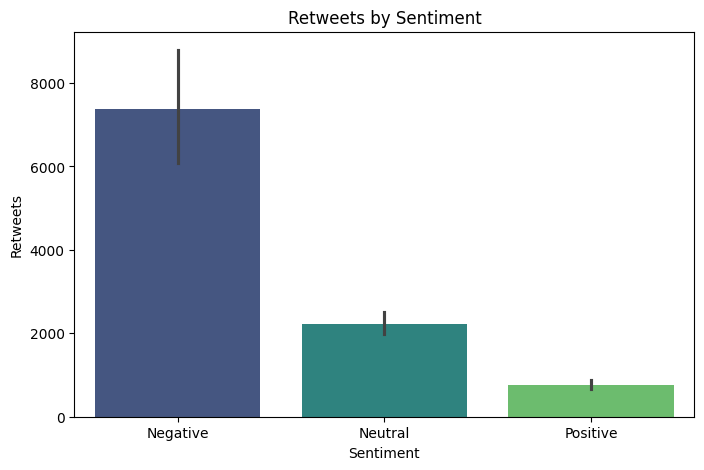

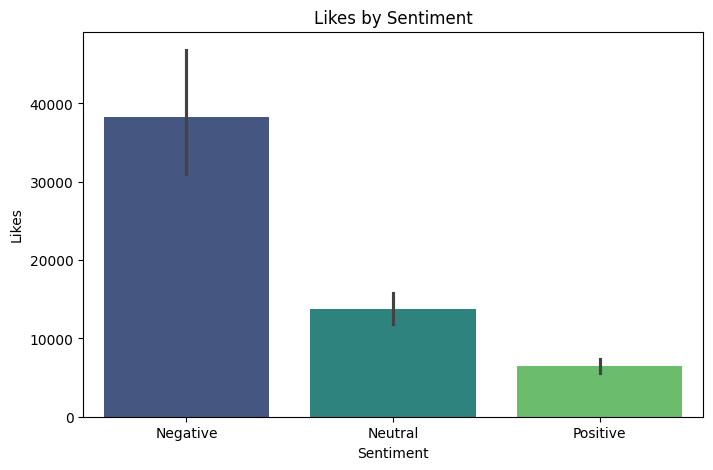

In [ ]:
# plot_engagement_by_sentiment Engagement metrics (Retweets, Likes) grouped by Sentiment
metrics = ["Retweets", "Likes"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x="Sentiment", y=metric, palette="viridis", order=["Negative", "Neutral", "Positive"])
    plt.title(f"{metric} by Sentiment")
    plt.xlabel("Sentiment")
    plt.ylabel(metric)
    plt.show()

## **Sentiment Distribution - Username** (stacked)
 - in stacked bar chart

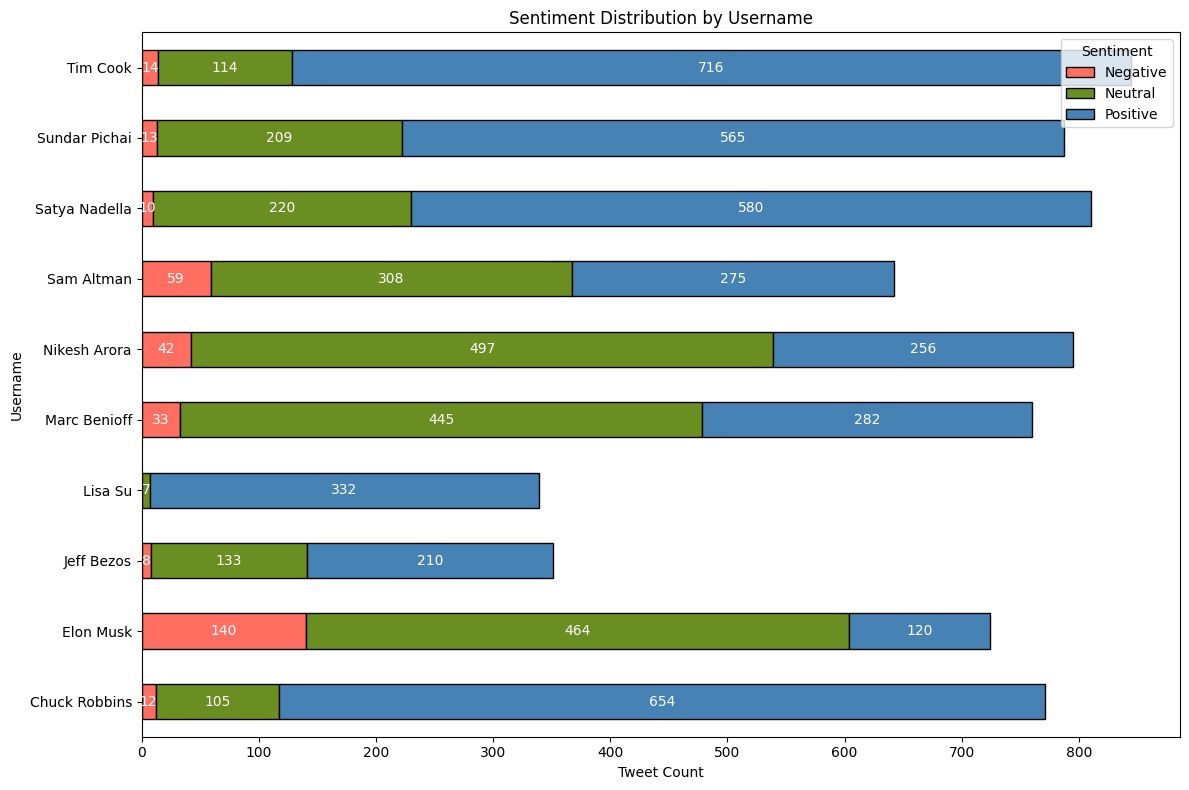

In [ ]:
# Prepare data for stacked bar chart
stacked_data = df.groupby(["Username", "Sentiment"]).size().unstack(fill_value=0)

# Plot horizontal stacked bar chart
ax = stacked_data.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 8),
    color=["#FF6F61", "#6B8E23", "#4682B4"],  # Custom colors for sentiments
    edgecolor="black"
)

# Annotate counts on the bars
for i, (index, row) in enumerate(stacked_data.iterrows()):
    cumulative_width = 0
    for sentiment, count in row.items():
        if count > 0:  # Only annotate non-zero counts
            ax.text(
                cumulative_width + count / 2,  # Position text at the center of the segment
                i,  # Position text at the correct bar
                str(count),  # The text to display
                ha="center",  # Horizontal alignment
                va="center",  # Vertical alignment
                fontsize=10,
                color="white" if count > 5 else "black"  # Contrast for visibility
            )
            cumulative_width += count

# Customize the plot
plt.title("Sentiment Distribution by Username")
plt.xlabel("Tweet Count")
plt.ylabel("Username")
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()


### **Observations:**

*   **Sentiment Distribution by Username:**
  * Most users have a significantly higher count of Positive tweets compared to Negative and Neutral ones.
  * *Elon Musk* and *Sam Altman* have noticeably higher counts of Negative tweets compared to others, with Elon Musk leading in negative sentiment.
  Lisa Su has no Negative or Neutral tweets recorded, reflecting entirely positive sentiment for her.
  * Users like *Tim Cook*, *Sundar Pichai*, and *Satya Nadella* display a balanced distribution with dominant positive sentiments.
  * *Jeff Bezos* and *Chuck Robbins* show moderate engagement with Neutral and Positive sentiments being the most prominent.
  * *Nikesh Arora* and *Marc Benioff* show higher counts of Neutral tweets compared to some of their peers.

*   **Engagement Insights:**
  * Positive tweets dominate the overall sentiment landscape across all users.
  The proportion of negative sentiment tweets is relatively low but still non-negligible for prominent figures like Elon Musk and Sam Altman.

*   **Tweet Volume:**
  * Chuck Robbins, Lisa Su, and Marc Benioff have relatively fewer overall tweets compared to the others.

# **Word Cloud**

* Helps visualize the most frequent words
* Shows word importance through size
* Can highlight significant textual data points
* Useful for getting a quick understanding of the sentiment

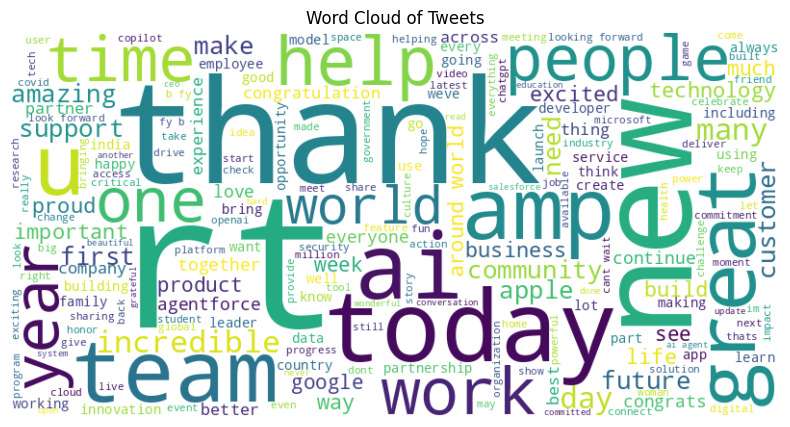

In [ ]:
# Generate Word Cloud
def generate_wordcloud(data, column):
    text_data = ' '.join(data[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tweets')
    plt.show()

# Example: Generate word cloud for the 'Cleaned Content' column
generate_wordcloud(df, 'Cleaned Content')

# **Saving Results**

* Saves the updated CSV file. `updated_ceo_tweets.csv`
* Saves the trained model to disk using pickle. `sentiment_model.pkl`

**Note:** The dataset now includes a new column ("Sentiment") containing the predicted sentiment for each tweet.

In [ ]:
def save_results(dataframe, model, csv_filename="updated_ceo_tweets.csv", model_filename="sentiment_model.pkl"):

    dataframe.to_csv(csv_filename, index=False)
    print(f"Updated CSV file saved as: {csv_filename}")

    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)
        print(f"Model saved as: {model_filename}")

# Save the updated dataset and model
save_results(df, model)

Updated CSV file saved as: updated_ceo_tweets.csv
Model saved as: sentiment_model.pkl


# **Conclusion**

The sentiment analysis of tweets by top CEOs provides valuable insights into public perception and engagement trends. The analysis revealed the following:



*   **Dominance of Positive Sentiments:**
  * Across all CEOs, positive sentiments dominate the tweet responses, indicating a generally favorable view of their activities or announcements. This highlights the importance of positive engagement in maintaining a strong public image.

*   **Individual Sentiment Variations:**
    * Elon Musk and Sam Altman received the highest proportion of negative sentiments, possibly reflecting polarizing opinions about their tweets or topics discussed.
    Lisa Su stands out with entirely positive sentiments, showcasing her strong brand perception and consistent public support.

*   **Engagement Insights:**
    * The higher count of neutral sentiments for users like Nikesh Arora and Marc Benioff suggests that their tweets are informational or non-polarizing.
    The variation in sentiment distribution among different CEOs highlights the diverse nature of their public interactions and the topics they discuss.

*   **Strategic Implications:**
    * This analysis can guide CEOs and their teams in crafting tweets that resonate positively with their audience.
    Identifying spikes in negative sentiments could help in pinpointing specific events or topics that need better communication or clarification.

*   **Broader Applications:**
    * The methodology and insights can be applied to other public figures or organizations to monitor public perception.
    This approach can be expanded to correlate sentiment trends with specific tweets or external events for deeper strategic insights.
---

By analyzing sentiment distribution and engagement metrics, this project highlights how public sentiment varies across individuals and the potential for leveraging such analysis in strategic decision-making. It also sets the stage for further enhancements like sentiment trend forecasting and more granular topic-based sentiment analysis.